# TP 1 : Introduction à Python en passant par les EDO

L'objectif du TP est de vous apprendre ou rappeler les rudiments du langage python indispensable pour illustrer le cours de "méthodes numériques pour les EDO". Vous pouvez vous référer au matériel pédagogique dans l'UE 3M100 https://python.guillod.org/ ou bien directement aux ressources internet, en sélectionnant les sites "officiels" https://docs.python.org/fr/3/ plutôt que les forums.


Plutôt que de repartir de 0 nous allons nous concentrer sur les outils dont nous avons besoin pour :
<ol>
<li> Définir une fonction python 
<li> Définir des tableaux de nombres contenant les solutions des ODE  (librairie numpy)
<li> Afficher ces solutions graphiquement (graphes et portraits de phase) (librairie matplotlib)
<li> Faire des opérations d'algèbre linéaire sur des matrices et des vecteurs (librairie scipy.linalg)
<li> Calculer des approximations numériques de la solution d'une ODE (librairie scipy.integrate)
</ol>

In [1]:
import numpy as np # donne acces a la librairie numpy, et definit l'abbreviation np
import scipy        # donne acces aux librairies scipy, scipy.linalg et scipy.integrate
import scipy.linalg
import scipy.integrate
import matplotlib.pyplot as plt # donne acces a la librairie matplotlib.pyplot, et definit l'abbreviation plt
import math     # donne acces aux fonctions et constantes mathematiques
%matplotlib inline    
# ouvre les fenetres graphiques dans le notebook


# Exercice 1

On reprend l'exercice 1 de la feuille de TD 1, où l'on a modélisé l'évolution de la température dans un solide par l'équation différentielle
$$\theta'(t)=-\lambda(\theta(t)-\theta_a)$$
où $\theta_a$ est la température ambiante, donnée, et $\theta(0)=\theta_0$ la température initiale, donnée également. Le coefficient $\lambda$ caractérise la diffusion de la chaleur dans le solide.

### Question 1 Définir une fonction

On a vu en TD que la solution de ce problème de Cauchy s'écrit $$\theta(t)=\theta_a+(\theta_0-\theta_a)e^{\displaystyle{-\lambda t}}$$ 

Ecrire une fonction "temp", qui prend en entrée $\theta_0$, $\theta_a$, $\lambda$ et un temps $t$ et qui calcule la solution.<br> 
Vérifier que si on pose $\lambda= \log(5/4)/5$, $\theta_0=70$ et $\theta_a=20$ on obtient $\theta(5)=60$


In [2]:
def exemple(x):
# le caractere # indique que ce qui suit est un commentaire
# En python une fonction comprend une premiere ligne declarative avec le nom de la fonction (ici "exemple") suivi des arguments entre parenthèses, terminée par ":""" 
# e l'interieur d'un bloc fonction, toutes les commandes doivent etre indentees.
    y=x+1   # Cette fonction va programmer en python y=f(x)=x+1 
    return y  # le mot reserve "return" permet de communiquer les resultats de la fonction a l'exterieur du bloc 
#Maintenant on va utiliser la fonction. On arrete l'indentation
t=3
z=exemple(t)
print ("exemple(",t,')=',z)



exemple( 3 )= 4


In [18]:
print ("a vous de jouer ci-dessous pour repondre a la question 1")


a vous de jouer ci-dessous pour repondre a la question 1


In [19]:
def temp(theta_0,theta_a,lam,t):
    return theta_a+(theta_0-theta_a)*math.exp(-lam*t)
theta_0=70
theta_a=20
lam=math.log(5/4)/5
t=5
print('theta({})={}'.format(t,temp(theta_0,theta_a,lam,t)))

theta(5)=60.0


### Question 2 - Discrétiser un intervalle 

On veut maintenant calculer les valeurs de la solution sur un intervalle de temps donné $[t_0,t_N]$, en discrétisant cet intervalle suffisamment finement pour que l'affichage graphique des valeurs de la fonction aux points discrétisés ait un aspect "continu". Plusieurs façons de dicrétiser un intervalle sont possibles en python. En voici trois :

In [20]:
nbp=10
t_0=1
t_N=10
absc0 = [t_0+ k*(t_N-t_0)/(nbp-1)  for k in  range (nbp)]    
print (type(absc0), absc0,type(absc0)==list)
pasDeDiscretisation=(t_N-t_0)/(nbp-1)
absc1 = np.arange (t_0,t_N+pasDeDiscretisation,pasDeDiscretisation)
print (type(absc1), absc1,type(absc1)==np.ndarray)
absc2 = np.linspace (t_0,t_N,nbp)
print (type(absc2), absc2,type(absc2)==np.ndarray)

<class 'list'> [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0] True
<class 'numpy.ndarray'> [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] True
<class 'numpy.ndarray'> [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] True


Assurez-vous que vous comprenez bien les trois méthodes. Que font les instructions "range", "np.arange" , "np.linspace" ? 


L'instruction range(nbp) crée une liste d'indices de 0 à nbp-1.<br> 
L'instruction np.arange crée un tableau "numpy.array" de valeurs à partir du point de départ, du point final et du pas entre deux points consécutifs. Le dernier point est au plus égal au deuxième argument.<br>
L'instruction np.linspace crée un tableau "numpy.array" de valeurs à partir du point de départ, du point final et du nombre de points dans le tableau.

Compléter les fonctions temp\_v\_list(t\_,\theta_0,\theta_a,\lambda) et temp\_v\_np(t\_,\theta_0,\theta_a,\lambda) qui prennent en entrée $\theta_0$, $\theta_a$, $\lambda$ et selon la fonction un tableau numpy de valeurs de temps $t\_ = (t_i)_{i=1,\ldots,N}$ ou une liste de ces valeurs, et qui renvoie un tableau de même  type que $t\_$ contenant la solution.

Compléter les tests avec timer pour comparer le temps d'execution en utilisant la fonction $map$ dans le cas où $t\_$ est une liste et la fonction temp

#### Attention de ne pas utiliser l'identifiant "lambda" pour une variable car il a un rôle bien particulier en python 

In [21]:
def temp_v_list(theta_0,theta_a,lam,t_):
    return list(map(lambda t: temp(theta_0,theta_a,lam,t), t_))
def temp_v_np(theta_0,theta_a,lam,t_):
    return theta_a+(theta_0-theta_a)*np.exp(-lam*t_)
print('absc0',temp_v_list(theta_0,theta_a,lam,absc0))
print('absc1',temp_v_np(theta_0,theta_a,lam,absc1))
print('absc2',temp_v_np(theta_0,theta_a,lam,absc2))

absc0 [67.81762498950185, 65.73050519273264, 63.734482957731124, 61.82558210365093, 60.0, 58.25409999160148, 56.5844041541861, 54.9875863661849, 53.46046568292074, 52.0]
absc1 [67.81762499 65.73050519 63.73448296 61.8255821  60.         58.25409999
 56.58440415 54.98758637 53.46046568 52.        ]
absc2 [67.81762499 65.73050519 63.73448296 61.8255821  60.         58.25409999
 56.58440415 54.98758637 53.46046568 52.        ]


In [22]:
from timeit import default_timer as timer
t_0=0
t_1=10.
nbp=100000
start = timer()
absc0 = [t_0+ k*(t_1-t_0)/(nbp-1)  for k in  range (nbp)] 
ord0=temp_v_list(theta_0,theta_a,lam,absc0)
end = timer()
print ('exec time avec list ',end - start)
start = timer()
absc1 = np.arange (t_0,t_1,(t_1-t_0)/(nbp-1))
ord1=temp_v_np(theta_0,theta_a,lam,absc1)
end = timer()
print ('exec time avec np.arange ',end - start)
start = timer()
absc2 = np.linspace (t_0,t_1,nbp)
ord2=temp_v_np(theta_0,theta_a,lam,absc2)
end = timer()
print ('exec time avec np.linspace ',end - start)

exec time avec list  0.054063132000001346
exec time avec np.arange  0.0016022279999994282
exec time avec np.linspace  0.0009315739999991024


### Question 3 - Tracer une courbe


"Tracer une courbe" sur un ordinateur, c'est-à-dire par exemple le graphe d'une fonction $y=x(t)$, c'est en fait une succession d'opérations
<UL> <li> Définir l'intervalle $[t_0,t_N]$ sur lequel on veut calculer la fonction
<li> Choisir une discrétisation suffisamment fine de cet intervalle et calculer les valeurs de la fonction en ces points (voir exercice 2)
<lI> Tracer la ligne brisée reliant les points $(t_i,x(t_i))_{i=0,\ldots,N}$ avec la fonction plot de la librairie graphique matplotlib
<li> Rajouter une légende, le nom des axes, etc, tout ce qui peut rendre la figure compréhensible donc intéressante
</UL>
Un exemple où on trace la fonction $y=sin(t)$ pour $t\in[0,\pi]$ en utilisant la discrétisation absc2

Text(0, 0.5, 'sin(t)')

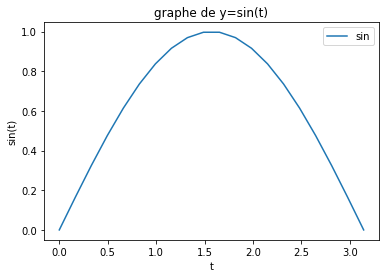

In [23]:
nbp=20
absc2 = np.linspace (0,math.pi,nbp)
ord2=np.sin(absc2)
plt.plot(absc2,ord2)               # trace la courbe
plt.title('graphe de y=sin(t)')    # affiche un titre
plt.legend(['sin'])                # affiche une legende (indispensable s'il y a plusieurs courbes sur le même graphique)
plt.xlabel('t')                    # affiche les labels d'axes
plt.ylabel('sin(t)')


Text(0, 0.5, 'f(t)')

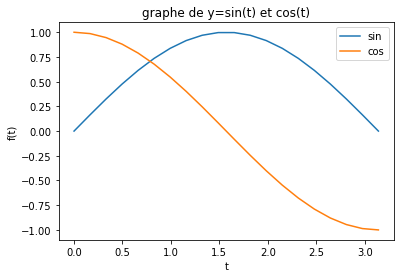

In [24]:
# on peut rajouter une autre courbe:
ord3=np.cos(absc2)
plt.plot(absc2,ord2,absc2,ord3)               #trace la courbe
plt.title('graphe de y=sin(t) et cos(t)')    # affiche un titre
plt.legend(['sin','cos'])                # affiche une legende (indispensable s'il y a plusieurs courbes sur le même graphique)
plt.xlabel('t')                    # affiche les labels d'axes
plt.ylabel('f(t)')



Text(0, 0.5, 'f(t)')

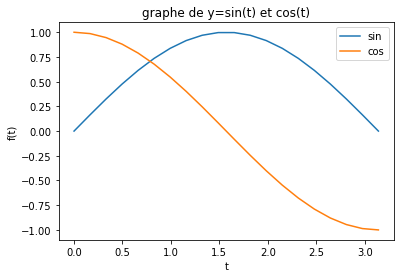

In [25]:
plt.plot(absc2,ord2,label="sin")               #trace la courbe
# c'est possible de ne pas tracer les deux courbes dans la meme commande
plt.plot(absc2,ord3,label="cos")               #trace la courbe
plt.title('graphe de y=sin(t) et cos(t)')    # affiche un titre
plt.legend()                # affiche une legende (indispensable s'il y a plusieurs courbes sur le même graphique)
plt.xlabel('t')                    # affiche les labels d'axes
plt.ylabel('f(t)')


Tracer sur le même graphique $\theta(t)$ en fonction de $t\in[t_0,t_N]$ pour différentes valeurs de $\lambda$ affichées dans la légende de la figure.
On choisira nbp suffisamment grand pour que les courbes  aient un aspect "continu".
Indication: Pour le label, utiliser label=r'\$\lambda=\${:.3f}'.format(lam)) dans le plot pour remplacer par la valeur de $\lambda$ (avec 3 chiffres après la virgule)

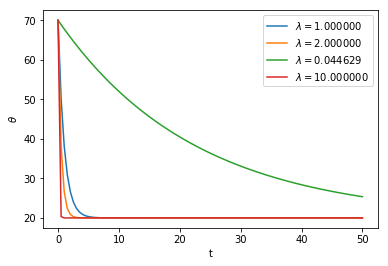

In [26]:
#A vous de jouer ci-dessous :
nbp=100
t_0=0
t_N=50
t_=np.linspace(t_0,t_N,nbp)
lam_=[1,2,math.log(5/4)/5,10]
for lam in lam_:
    theta_=temp_v_np(theta_0,theta_a,lam,t_)
    plt.plot(t_,theta_,label=r'$\lambda=${:3f}'.format(lam))
plt.legend()
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.show()


### Question 4. Calculer une solution approchée d'une EDO.
Dans cet exercice, on connait la solution exacte de l'EDO
$$\theta'(t)=-\lambda(\theta(t)-\theta_a).$$
On n'a souvent accès qu'à une solution approchée, calculée par un des algorithmes qu'on verra dans ce cours, ou bien par un "solveur" disponible dans une bibliothèque. Par exemple, si on programme en python, on peut utiliser "scipy.integrate.odeint" 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html



In [27]:
from scipy.integrate import odeint


On définit la fonction second membre de l'ODE. Conventionnellement elle est codée pour correspondre à l'ODE
$$ y'(t)=f(y(t),t).$$
Si on veut le même ordre  que dans le cours c'est à dire 
$$ y'(t)=f(t,y(t)),$$
il faudra préciser au solveur que l'ordre est inversé en spécifiant $tfirst=True$ à l'appel.<br>
Les parametres constants de la fonction second membre sont donnés ensuite, et spécifiés à l'appel du solveur par le mot clef {\tt args= le tupple des parametres}
<br>
Dans notre exemple la fonction second membre ne dépend pas explicitement du temps. Elle est donnée par 
$$(\theta,t)\rightarrow f(\theta,t)=-\lambda(\theta-\theta_a)$$
D'où la fonction python

In [28]:
def dtemp(theta,t,theta_a,lam):
    return -lam*(theta-theta_a)

Text(0, 0.5, '$\\theta$')

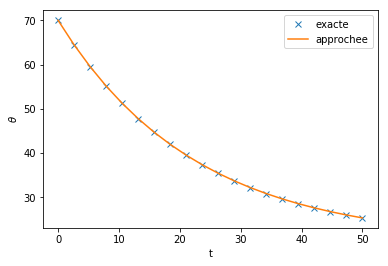

In [40]:
#on définit la suite de points où on veut calculer la solution approchée
#la meme que pour la solution exacte donc t_
nbp=20
t_0=0
t_N=50
t_=np.linspace(t_0,t_N,nbp)

#la valeur initiale
theta_0=70

# les valeurs des paramètres
lam=math.log(5/4)/5
theta_a=20

theta_num = odeint(dtemp, theta_0, t_, args=(theta_a, lam))
theta_exacte=temp_v_np(theta_0,theta_a,lam,t_)
plt.plot(t_,theta_exacte,'x',label='exacte')
plt.plot(t_,theta_num,label='approchee')
plt.legend()
plt.xlabel('t')
plt.ylabel(r'$\theta$')

De la même manière, représenter graphiquement les solutions exactes et approchées des EDO étudiées pendant le TD1
<ul>
<li> $x'(t) =a x(t) + b, x(0)= 0$,
<li> $x'(t) = x(t) + \sin (t), x(0)=1$,
<li>$(1+t^2) x'(t) +t x(t) =1$.
</ul>

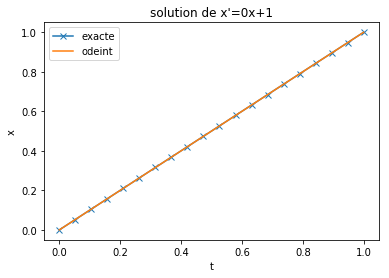

Text(0.5, 1.0, "solution de x'=1x+1")

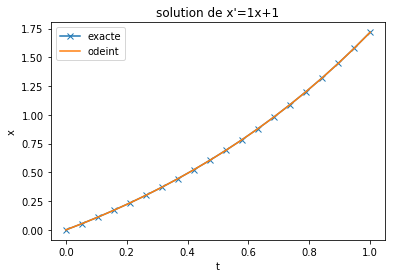

In [38]:
def secmbr1(x,t,a,b):
    return a*x+b
def exacte1(t,a,b):
    if a==0:
        return b*t
    else:
        return b*(np.exp(a*t)-1)/a
nbp=20
t_0=0
t_1=1
x_0=0
t_=np.linspace(t_0,t_1,nbp)
# 1er cas a=0
a=0
b=1
x_exacte =  exacte1(t_,a,b)
x_num=odeint(secmbr1, x_0, t_, args=(a,b))
plt.plot(t_,x_exacte,'-x',label='exacte')
plt.plot(t_,x_num,label='odeint')
plt.legend()
plt.xlabel('t')
plt.ylabel('x')
plt.title("solution de x'={}x+{}".format(a,b))
plt.show()
# 1er cas a<>0
a=1
b=1
x_exacte =  exacte1(t_,a,b)
x_num=odeint(secmbr1, x_0, t_, args=(a,b))
plt.plot(t_,x_exacte,'-x',label='exacte')
plt.plot(t_,x_num,label='odeint')
plt.legend()
plt.xlabel('t')
plt.ylabel('x')
plt.title("solution de x'={}x+{}".format(a,b))

Text(0.5, 1.0, "solution de x'=x+sin(t)")

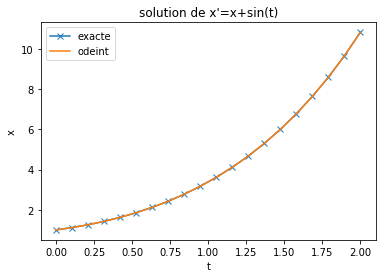

In [31]:
def secmbr2(x,t):
    return x+np.sin(t)
def exacte2(t):
    return 1.5*np.exp(t)-0.5*(np.cos(t)+np.sin(t))
nbp=20
t_0=0
t_1=2
x_0=1
t_=np.linspace(t_0,t_1,nbp)
x_exacte =  exacte2(t_)
x_num=odeint(secmbr2, x_0, t_)
plt.plot(t_,x_exacte,'-x',label='exacte')
plt.plot(t_,x_num,label='odeint')
plt.legend()
plt.xlabel('t')
plt.ylabel('x')
plt.title("solution de x'=x+sin(t)")

Pour le 3eme exemple on doit spécifier la condition initiale $x(0)=x_0$ de manière à fixer le parametre $a$ dans la solution exacte $$x(t)=\frac{x_0+\argsh(t)}{\sqrt{1+t^2}}$$



Text(0, 0.5, 'x(t)')

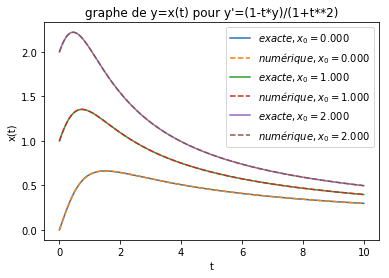

In [35]:
def secmbr3(x,t):
    return ((1-t*x)/(1+t**2))
def exacte3(t,x_0):
    return((x_0+np.arcsinh(t))/np.sqrt(1+t**2))


nbp=200
t_0=0
t_N=10
t_=np.linspace(t_0,t_N,nbp)
#on trace x(t) pour trois valeurs différentes de x_0 : 0,1,2
for x_0 in range (3) : 
    x_exacte = exacte3(t_,x_0)
    x_num=odeint(secmbr3, x_0, t_, args=())
    plt.plot(t_,x_exacte,label=r'$exacte,x_0=${:.3f}'.format(x_0))
    plt.plot(t_,x_num,'--',label=r'$numérique,x_0=${:.3f}'.format(x_0))
plt.title("graphe de y=x(t) pour y'=(1-t*y)/(1+t**2)")
plt.legend()
plt.xlabel('t') 
plt.ylabel('x(t)')